In [369]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 讀取 CSV 文件
file_path = '../data/distance_matrix_052.csv'  # 替換成您的 CSV 文件路徑
distance_matrix = pd.read_csv(file_path, index_col=0)  # 假設 CSV 文件中第一列是索引

# 轉換為 NumPy 數組（如果需要）


In [370]:
import numpy as np

is_square = distance_matrix.shape[0] == distance_matrix.shape[1]
print("Matrix is square:", is_square)


diagonal_elements = np.diag(distance_matrix)
are_diagonals_zero = np.all(diagonal_elements == 0)
print("All diagonal elements are zero:", are_diagonals_zero)


Matrix is square: True
All diagonal elements are zero: True


Best number of clusters: 2


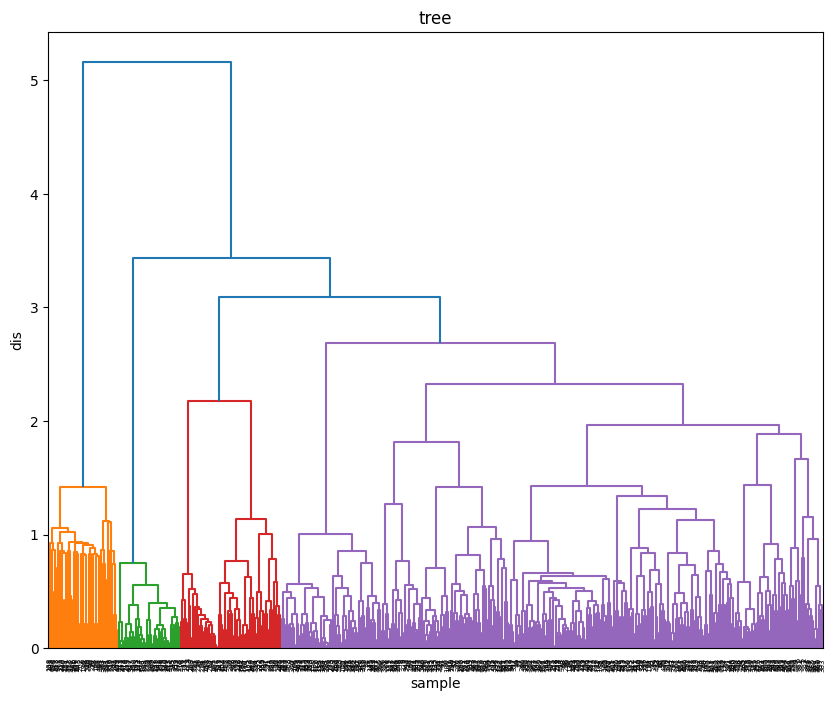

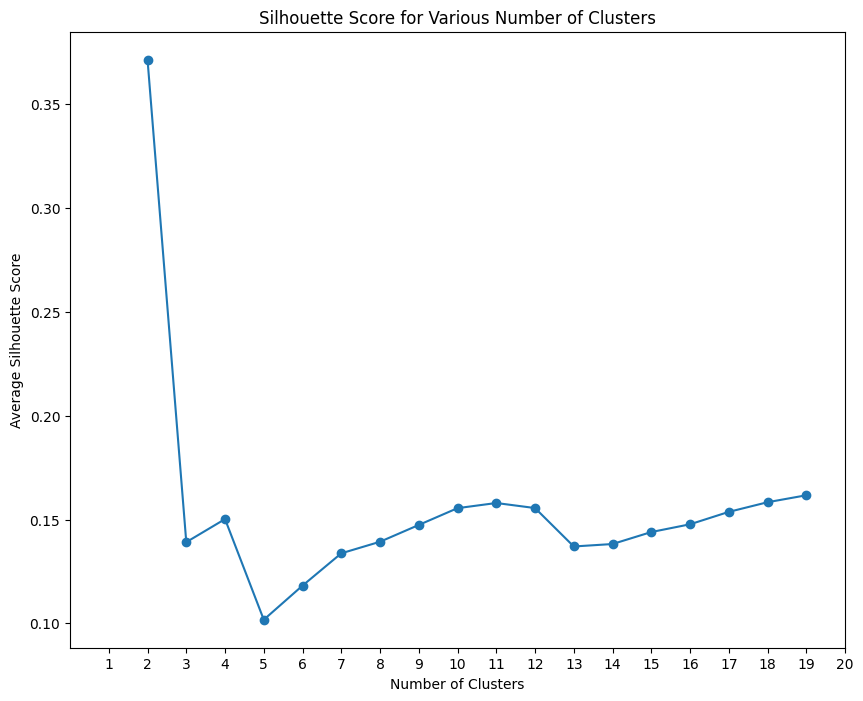

In [371]:
from scipy.spatial.distance import squareform


distance_matrix = distance_matrix.fillna(1)
distance_matrix[distance_matrix == 0] = 1

distance_matrix = distance_matrix.values
np.fill_diagonal(distance_matrix, 0)


len(distance_matrix)

condensed_matrix = squareform(distance_matrix)

Z = linkage(condensed_matrix, method='ward')

plt.figure(figsize=(10, 8))
dendrogram(Z,color_threshold=3)
plt.title('tree')
plt.xlabel('sample')
plt.ylabel('dis')

# 設定不同的分群數範圍
range_n_clusters = list(range(2, 20))
 
silhouette_avg = []

# 計算不同分群數的輪廓係數
for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg.append(silhouette_score(distance_matrix, labels, metric='precomputed'))

# 找到輪廓係數最高的分群數
best_n_clusters = range_n_clusters[np.argmax(silhouette_avg)]
print("Best number of clusters:", best_n_clusters)


plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Various Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xlim(0, 20)
plt.xticks(range(1, 21, 1))
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6408\1543522542.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(data, method='ward')


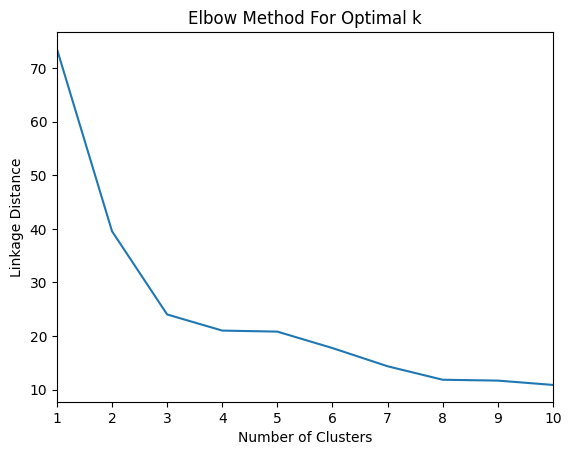

In [372]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 假設您有一個距離矩陣或原始數據
data = distance_matrix
linkage_matrix = linkage(data, method='ward')

# 計算不同群集數下的總連接距離（群集內距離）
last = linkage_matrix[-10:, 2]  # 取最後 10 次合併的距離
last_rev = last[::-1]  # 反轉使其按群集數增加的順序排列
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

plt.xlabel('Number of Clusters')
plt.ylabel('Linkage Distance')
plt.title('Elbow Method For Optimal k')
plt.xlim(1, 10)
plt.show()
